In [22]:
import pandas as pd
import numpy as np


## Step 1 Data Processing

### load and join dataset

In [23]:
df_products = pd.read_excel('bikes.xlsx')
df_orders = pd.read_excel('orders.xlsx')
df_customers = pd.read_excel('bikeshops.xlsx')

In [24]:
df_products.head()

,bike.id,model,category1,category2,frame,price
0,1,Supersix Evo Black Inc.,Road,Elite Road,Carbon,12790
1,2,Supersix Evo Hi-Mod Team,Road,Elite Road,Carbon,10660
2,3,Supersix Evo Hi-Mod Dura Ace 1,Road,Elite Road,Carbon,7990
3,4,Supersix Evo Hi-Mod Dura Ace 2,Road,Elite Road,Carbon,5330
4,5,Supersix Evo Hi-Mod Utegra,Road,Elite Road,Carbon,4260


In [25]:
df_orders.head()

,order.id,order.line,order.date,customer.id,product.id,quantity
1,1,1,2011-01-07,2,48,1
2,1,2,2011-01-07,2,52,1
3,2,1,2011-01-10,10,76,1
4,2,2,2011-01-10,10,52,1
5,3,1,2011-01-10,6,2,1


In [26]:
df_customers.head()

,bikeshop.id,bikeshop.name,bikeshop.city,bikeshop.state,latitude,longitude
0,1,Pittsburgh Mountain Machines,Pittsburgh,PA,40.440625,-79.995886
1,2,Ithaca Mountain Climbers,Ithaca,NY,42.443961,-76.501881
2,3,Columbus Race Equipment,Columbus,OH,39.961176,-82.998794
3,4,Detroit Cycles,Detroit,MI,42.331427,-83.045754
4,5,Cincinnati Speed,Cincinnati,OH,39.103118,-84.512020


In [27]:
df = df_orders.merge(df_customers,how = 'inner',left_on = 'customer.id',right_on = 'bikeshop.id')\
.merge(df_products,how = 'inner', left_on='product.id',right_on = 'bike.id')
df.sample(5)

,order.id,order.line,order.date,customer.id,product.id,quantity,bikeshop.id,bikeshop.name,bikeshop.city,bikeshop.state,latitude,longitude,bike.id,model,category1,category2,frame,price
10076,1725,3,2015-05-19,10,77,1,10,Kansas City 29ers,Kansas City,KS,39.114053,-94.627464,77,Beast of the East 2,Mountain,Trail,Aluminum,2130
6398,83,19,2011-04-12,11,59,1,11,New York Cycles,New York,NY,40.712784,-74.005941,59,Scalpel-Si Carbon 3,Mountain,Cross Country Race,Carbon,5330
15149,1247,7,2014-05-16,8,29,1,8,Denver Bike Shop,Denver,CO,39.739236,-104.990251,29,Synapse Carbon Ultegra 4,Road,Endurance Road,Carbon,2660
9692,1804,1,2015-07-06,10,87,1,10,Kansas City 29ers,Kansas City,KS,39.114053,-94.627464,87,Habit 5,Mountain,Trail,Aluminum,2340
7659,1185,19,2014-04-03,10,95,4,10,Kansas City 29ers,Kansas City,KS,39.114053,-94.627464,95,Catalyst 2,Mountain,Sport,Aluminum,585


In [28]:
df.describe()

,order.id,order.line,customer.id,product.id,quantity,bikeshop.id,latitude,longitude,bike.id,price
count,15644.000000,15644.000000,15644.000000,15644.000000,15644.000000,15644.000000,15644.000000,15644.000000,15644.000000,15644.000000
mean,997.953081,8.471619,13.458195,49.475326,1.289440,13.458195,37.942601,-95.049026,49.475326,3521.110969
std,569.694443,6.816723,7.716678,28.231556,0.884835,7.716678,4.591913,13.423425,28.231556,2667.194590
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.761680,-122.676482,1.000000,415.000000
25%,520.000000,3.000000,8.000000,25.000000,1.000000,8.000000,35.467560,-104.990251,25.000000,1840.000000
50%,985.500000,7.000000,10.000000,48.000000,1.000000,10.000000,39.114053,-94.627464,48.000000,2700.000000
75%,1490.000000,13.000000,19.000000,75.000000,1.000000,19.000000,40.440625,-83.743038,75.000000,4260.000000
max,2000.000000,30.000000,30.000000,97.000000,10.000000,30.000000,47.606209,-71.412834,97.000000,12790.000000


### Convert price into categorical variables

In [29]:
price_half_point = df.price.median()
# code 1 as high price, 0 as low price
df['price'] = np.where(df['price'] >= price_half_point,1,0)

### Spread the customers by quantity of bike models purchased

In [30]:
df_group = df.groupby(['bikeshop.name','model','category1', 'category2', 'frame', 'price',]).sum()
df_spread = df_group.reset_index() 

In [31]:
customer_trend = pd.pivot_table(df_spread,values = 'quantity',index =
               ['model','category1', 'category2', 'frame', 'price'],columns = 'bikeshop.name',
               aggfunc = 'sum').reset_index()
customer_trend = customer_trend.fillna(0)

### scale the quantity data

In [32]:
num_store = df['bikeshop.name'].nunique()
for i in range(5,5+num_store):
    customer_trend.iloc[:,i] = customer_trend.iloc[:,i]/sum(customer_trend.iloc[:,i])
customer_trend

bikeshop.name,model,category1,category2,frame,price,Albuquerque Cycles,Ann Arbor Speed,Austin Cruisers,Cincinnati Speed,Columbus Race Equipment,...,Philadelphia Bike Shop,Phoenix Bi-peds,Pittsburgh Mountain Machines,Portland Bi-peds,Providence Bi-peds,San Antonio Bike Shop,San Francisco Cruisers,Seattle Race Equipment,Tampa 29ers,Wichita Speed
0,Bad Habit 1,Mountain,Trail,Aluminum,1,0.017483,0.006645,0.008130,0.005115,0.010152,...,0.024490,0.011276,0.015915,0.010870,0.009225,0.021505,0.002674,0.015625,0.019417,0.005917
1,Bad Habit 2,Mountain,Trail,Aluminum,0,0.006993,0.009967,0.004065,0.000000,0.000000,...,0.004082,0.019027,0.002653,0.010870,0.023985,0.000000,0.002674,0.007812,0.000000,0.000000
2,Beast of the East 1,Mountain,Trail,Aluminum,1,0.010490,0.014950,0.008130,0.000000,0.000000,...,0.000000,0.012685,0.005305,0.010870,0.009225,0.005376,0.000000,0.015625,0.009709,0.000000
3,Beast of the East 2,Mountain,Trail,Aluminum,0,0.010490,0.009967,0.008130,0.000000,0.005076,...,0.000000,0.023256,0.010610,0.015528,0.014760,0.010753,0.002674,0.023438,0.029126,0.001972
4,Beast of the East 3,Mountain,Trail,Aluminum,0,0.003497,0.003322,0.000000,0.000000,0.002538,...,0.020408,0.016209,0.002653,0.020186,0.007380,0.032258,0.000000,0.007812,0.009709,0.000000
5,CAAD Disc Ultegra,Road,Elite Road,Aluminum,0,0.013986,0.026578,0.020325,0.015345,0.010152,...,0.016327,0.012685,0.002653,0.013975,0.007380,0.005376,0.002674,0.007812,0.000000,0.009862
6,CAAD12 105,Road,Elite Road,Aluminum,0,0.006993,0.014950,0.020325,0.010230,0.027919,...,0.032653,0.008457,0.000000,0.009317,0.001845,0.021505,0.013369,0.023438,0.000000,0.007890
7,CAAD12 Black Inc,Road,Elite Road,Aluminum,1,0.000000,0.016611,0.004065,0.015345,0.027919,...,0.008163,0.002819,0.005305,0.003106,0.005535,0.000000,0.018717,0.000000,0.000000,0.015779
8,CAAD12 Disc 105,Road,Elite Road,Aluminum,0,0.013986,0.014950,0.024390,0.007673,0.025381,...,0.020408,0.017618,0.000000,0.031056,0.009225,0.021505,0.024064,0.015625,0.000000,0.007890
9,CAAD12 Disc Dura Ace,Road,Elite Road,Aluminum,1,0.048951,0.008306,0.008130,0.017903,0.012690,...,0.000000,0.005638,0.026525,0.006211,0.005535,0.005376,0.016043,0.015625,0.024272,0.013807


## Step 2: Perform k-Means Clustering

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_means_data = customer_trend.iloc[:,5:].transpose()
min_clusters = 4
max_clusters = 8

best_k = None
best_labels = None
best_score = -1
best_model = None

for k in range(min_clusters,max_clusters+1):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(k_means_data)
    labels = kmeans.labels_
    score = silhouette_score(k_means_data,labels)
    print ('k = ', k, ' score = ', score)
    if score>best_score:
        best_k = k
        best_score = score
        best_labels = labels
        best_model = kmeans
print ('The chosen parameter k is ', best_k, ' because it has the highest silhouette_score.')   

k =  4  score =  0.17618583226404122
k =  5  score =  0.1695040632974669
k =  6  score =  0.16767735128676947
k =  7  score =  0.15840314046675932
k =  8  score =  0.10568105128477218
The chosen parameter k is  4  because it has the highest silhouette_score.


## Step 3 Analyze the result

### print out stores in each cluster

In [34]:
customer_trend
cluster_store = pd.DataFrame(customer_trend.columns[5:])
cluster_store['cluster'] = best_labels

In [35]:
for i in range(0,best_k):
    cluster = cluster_store[cluster_store['cluster'] == i]
    print ('Cluster', i)
    print (cluster['bikeshop.name'].values)
    print ()

Cluster 0
['Albuquerque Cycles']

Cluster 1
['Ann Arbor Speed' 'Austin Cruisers' 'Dallas Cycles' 'Denver Bike Shop'
 'Detroit Cycles' 'Indianapolis Velocipedes' 'Kansas City 29ers'
 'Los Angeles Cycles' 'Miami Race Equipment' 'Minneapolis Bike Shop'
 'Nashville Cruisers' 'New Orleans Velocipedes' 'New York Cycles'
 'Oklahoma City Race Equipment' 'Philadelphia Bike Shop' 'Phoenix Bi-peds'
 'Portland Bi-peds' 'Providence Bi-peds' 'San Antonio Bike Shop'
 'Seattle Race Equipment']

Cluster 2
['Ithaca Mountain Climbers' 'Pittsburgh Mountain Machines' 'Tampa 29ers']

Cluster 3
['Cincinnati Speed' 'Columbus Race Equipment' 'Las Vegas Cycles'
 'Louisville Race Equipment' 'San Francisco Cruisers' 'Wichita Speed']



### print out the preferences of the customer segments 

In [36]:
# print out model features in each cluster
for cluster in range(best_k):
    centroid = best_model.cluster_centers_[cluster]
    top_10_sorted_index = np.argsort(centroid)[::-1][:10]
    print('Cluster ', cluster)
    for i in range(10):
        model_index = top_10_sorted_index[i]
        model = customer_trend.iloc[model_index,1:5].tolist()
        print (i, model)

Cluster  0
0 ['Road', 'Elite Road', 'Aluminum', 1]
1 ['Mountain', 'Cross Country Race', 'Carbon', 1]
2 ['Mountain', 'Sport', 'Aluminum', 0]
3 ['Mountain', 'Trail', 'Carbon', 1]
4 ['Road', 'Endurance Road', 'Aluminum', 0]
5 ['Road', 'Elite Road', 'Aluminum', 0]
6 ['Road', 'Endurance Road', 'Carbon', 1]
7 ['Mountain', 'Sport', 'Aluminum', 0]
8 ['Mountain', 'Trail', 'Aluminum', 1]
9 ['Road', 'Endurance Road', 'Carbon', 0]
Cluster  1
0 ['Road', 'Triathalon', 'Carbon', 1]
1 ['Mountain', 'Cross Country Race', 'Aluminum', 0]
2 ['Road', 'Endurance Road', 'Aluminum', 0]
3 ['Road', 'Endurance Road', 'Aluminum', 0]
4 ['Road', 'Triathalon', 'Carbon', 1]
5 ['Road', 'Endurance Road', 'Carbon', 0]
6 ['Road', 'Elite Road', 'Aluminum', 0]
7 ['Road', 'Elite Road', 'Carbon', 1]
8 ['Road', 'Endurance Road', 'Aluminum', 0]
9 ['Road', 'Endurance Road', 'Carbon', 0]
Cluster  2
0 ['Mountain', 'Cross Country Race', 'Carbon', 1]
1 ['Mountain', 'Over Mountain', 'Carbon', 1]
2 ['Mountain', 'Cross Country Race', '

### Cluster Analysis

Cluster 0: Stores in this cluster appears to order all types of bikes. Top 10 models they order include roughly equal amount of bikes in different catagories, frame material and price points. They are likely to be big and comprehensive bike stores that offer various models catering to different bike buyers 

Cluster 1: Stores in this cluster order Road bikes that are enduring. They don't have a particular preference for the frame material, but they mostly order bikes that are on the cheaper side. 

Cluster 2: Stores in this cluster order mainly carbon Mountain bikes that are on the expensive side. 

Cluster 3: Stores in this cluster order mainly Road bikes. They are similar to cluster 1, but they mostly order expensive bikes.

### Extra Credit

In [37]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
m = 4
n = 8
best_cluster = 0
best_model = None
best_score = -1
for i in range(m,n+1):
    am = AgglomerativeClustering(n_clusters = i)
    am.fit(k_means_data)
    labels = am.labels_ 
    score = silhouette_score(k_means_data,labels)
    print ('n_cluster = ', i, ' score = ', score)
    if score>best_score:
        best_cluster = i
        best_score = score
        best_labels = labels
        best_model = am
print ('The chosen cluster number is ', best_cluster, ' because it has the highest silhouette score.')   

n_cluster =  4  score =  0.17628084123482798
n_cluster =  5  score =  0.17881270878689676
n_cluster =  6  score =  0.16477836498720333
n_cluster =  7  score =  0.1637078367595804
n_cluster =  8  score =  0.15085052973880986
The chosen cluster number is  5  because it has the highest silhouette score.


In [38]:
h_cluster_store = pd.DataFrame(customer_trend.columns[5:])
h_cluster_store['cluster'] = best_labels
for i in range(0,best_cluster):
    cluster = h_cluster_store[h_cluster_store['cluster'] == i]
    print ('Cluster', i)
    print (cluster['bikeshop.name'].values)
    print ()

Cluster 0
['Ann Arbor Speed' 'Austin Cruisers' 'Indianapolis Velocipedes'
 'Miami Race Equipment' 'Nashville Cruisers' 'New Orleans Velocipedes'
 'Oklahoma City Race Equipment' 'Seattle Race Equipment']

Cluster 1
['Albuquerque Cycles' 'Dallas Cycles' 'Denver Bike Shop' 'Detroit Cycles'
 'Kansas City 29ers' 'Los Angeles Cycles' 'Minneapolis Bike Shop'
 'New York Cycles' 'Phoenix Bi-peds' 'Portland Bi-peds'
 'Providence Bi-peds']

Cluster 2
['Cincinnati Speed' 'Columbus Race Equipment' 'Las Vegas Cycles'
 'Louisville Race Equipment' 'San Francisco Cruisers' 'Wichita Speed']

Cluster 3
['Ithaca Mountain Climbers' 'Pittsburgh Mountain Machines' 'Tampa 29ers']

Cluster 4
['Philadelphia Bike Shop' 'San Antonio Bike Shop']



In [39]:
k_means_data['cluster'] = best_model.fit_predict(k_means_data)

In [40]:
# calculating the "centroid" by taking the mean of each cluster
h_centroids = k_means_data.groupby('cluster').mean()
h_centroids

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.010127,0.008157,0.012970,0.010810,0.005640,0.018546,0.014615,0.011152,0.015795,0.008316,...,0.022305,0.013061,0.010873,0.008864,0.009750,0.007173,0.001152,0.000920,0.002061,0.010230
1,0.012131,0.014289,0.014094,0.013655,0.010792,0.011705,0.012785,0.004824,0.015987,0.008330,...,0.013704,0.013643,0.011439,0.014985,0.013587,0.016265,0.007186,0.008614,0.008160,0.012295
2,0.005509,0.000446,0.000267,0.002464,0.001801,0.012850,0.013192,0.019471,0.014013,0.016430,...,0.013462,0.000690,0.001178,0.001718,0.000693,0.001337,0.010344,0.008075,0.015262,0.015824
3,0.017843,0.004576,0.012125,0.019311,0.007549,0.000884,0.000527,0.004142,0.000264,0.019569,...,0.000527,0.005553,0.013273,0.007812,0.015998,0.018478,0.012688,0.021043,0.025935,0.023261
4,0.022998,0.002041,0.002688,0.005376,0.026333,0.010851,0.027079,0.004082,0.020957,0.002688,...,0.011499,0.024940,0.020309,0.004729,0.008163,0.011499,0.002688,0.000000,0.002688,0.030415


In [41]:
# print out model features in each cluster
for cluster in range(best_cluster):
    centroid = h_centroids[cluster]
    top_10_sorted_index = np.argsort(h_centroids.iloc[cluster,:])[::-1][:10]
    print('Cluster ', cluster)
    for i in range(10):
        model_index = top_10_sorted_index.iloc[i]
        model = customer_trend.iloc[model_index,1:5].tolist()
        print (i, model)

Cluster  0
0 ['Road', 'Endurance Road', 'Aluminum', 0]
1 ['Road', 'Elite Road', 'Aluminum', 1]
2 ['Road', 'Endurance Road', 'Aluminum', 0]
3 ['Road', 'Triathalon', 'Carbon', 1]
4 ['Road', 'Elite Road', 'Carbon', 1]
5 ['Road', 'Endurance Road', 'Aluminum', 0]
6 ['Road', 'Endurance Road', 'Carbon', 0]
7 ['Road', 'Elite Road', 'Aluminum', 0]
8 ['Road', 'Triathalon', 'Carbon', 1]
9 ['Road', 'Elite Road', 'Carbon', 0]
Cluster  1
0 ['Mountain', 'Cross Country Race', 'Aluminum', 0]
1 ['Mountain', 'Sport', 'Aluminum', 0]
2 ['Mountain', 'Cross Country Race', 'Carbon', 1]
3 ['Mountain', 'Sport', 'Aluminum', 0]
4 ['Road', 'Elite Road', 'Aluminum', 0]
5 ['Road', 'Elite Road', 'Aluminum', 0]
6 ['Road', 'Elite Road', 'Aluminum', 0]
7 ['Mountain', 'Trail', 'Aluminum', 1]
8 ['Road', 'Endurance Road', 'Carbon', 0]
9 ['Mountain', 'Sport', 'Aluminum', 0]
Cluster  2
0 ['Road', 'Endurance Road', 'Carbon', 1]
1 ['Road', 'Triathalon', 'Carbon', 1]
2 ['Road', 'Elite Road', 'Carbon', 1]
3 ['Road', 'Triathalon'

### cluster analysis

cluster 0: cheap road bikes, no preference for frame material, resemble cluster 1 in Kmeans clustering

cluster 1: cheap bikes, mostly aluminum, no strong preference for categories

cluster 2: expensive road bikes, resembles cluster 3 in Kmeans clustering

cluster 3: mostly mountain, carbon expensive bikes, resembles cluster 2 in Kmeans clustering

cluster 4: cheap bikes, mostly aluminum, no strong preference for categories

Comparing with the results from Kmeans and Hierachical clustering, the segments are mostly the same. According to the silhouette score, I chose 5 for the number of components in hierchical clustering, but the difference between cluster 4 and cluster 1 is not very substantial looking at the average, except one slightly prefers mountain bikes and the other slightly prefers road bikes. In Kmeans clustering, the difference among groups is easier to tell.

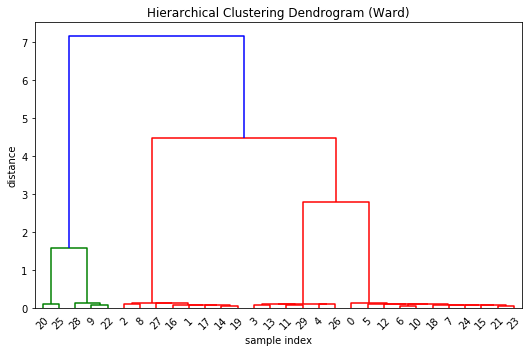

In [69]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linkage_matrix = linkage(k_means_data, 'ward')
figure = plt.figure(figsize=(7.5, 5))
dn = dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.tight_layout()
plt.show()

The dendogram shows that it

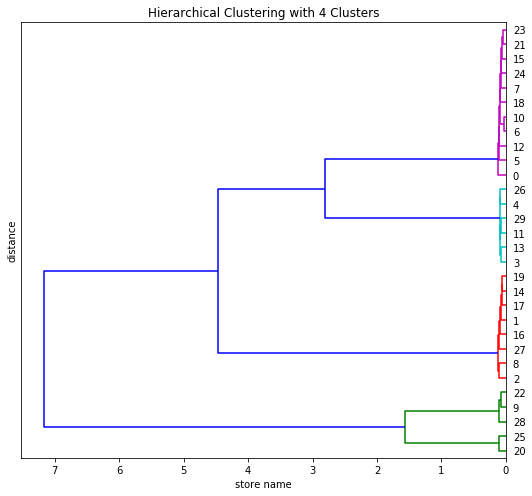

In [104]:
figure = plt.figure(figsize=(7.5, 7))
dn = dendrogram(
    linkage_matrix,
    p = 4,
    color_threshold=2, 
    #labels = customer_trend.columns[5:],
    leaf_rotation=0,
    orientation='left'
)
plt.title('Hierarchical Clustering with 4 Clusters')
plt.xlabel('store name')
plt.ylabel('distance')
plt.tight_layout()
plt.show()

In [98]:
dn['leaves']

In [102]:
dn['color_list']

['g',
 'g',
 'g',
 'g',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'c',
 'c',
 'c',
 'c',
 'c',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'b',
 'b',
 'b']

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=4,
            pooling_func='deprecated')

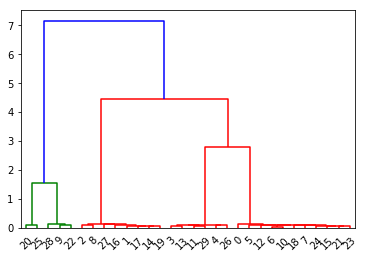

In [107]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
m = 4
n = 8
best_cluster = 0
best_model = None
best_score = -1
for i in range(m,n+1):
    am = AgglomerativeClustering(n_clusters = i)
    am.fit(k_means_data)
    labels = am.labels_ 
    score = silhouette_score(k_means_data,labels)
    print ('n_cluster = ', i, ' score = ', score)
    if score>best_score:
        best_cluster = i
        best_score = score
        best_labels = labels
        best_model = am
print ('The chosen cluster number is ', best_cluster, ' because it has the highest silhouette score.')   

dn = dendrogram(linkage_matrix)
hc = AgglomerativeClustering(n_clusters = 4)
y_hc = hc.fit_predict(k_means_data)